# xarray package

xarray is a crossbreed between numpy and pandas. It allows to annotate pure numerical (numpy-like) data with indices, attributes and so on.

## Required imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
import xarray as xr

## Running example

Create a 2D array of floating point values that represent temperatures of a plane. The dimensions are named `x` and `y`, and the coordinates for those dimensions are provided.

In [2]:
grid_size = 11
temperature = xr.DataArray(np.random.normal(loc=21.0, scale=2.0, size=(grid_size, grid_size)),
                           dims=('x', 'y'), coords={'x': np.linspace(0.0, 1.0, grid_size),
                                                    'y': np.linspace(0.0, 1.0, grid_size)})
temperature

<xarray.DataArray (x: 11, y: 11)>
array([[19.658645, 21.267661, 22.583356, 20.234762, 17.25263 , 21.701709,
        22.037055, 24.062724, 21.296284, 19.964681, 21.669269],
       [21.00642 , 16.669199, 18.681732, 20.428484, 22.527563, 18.618501,
        20.137285, 19.446396, 18.910241, 22.12052 , 18.291198],
       [26.976699, 20.443434, 22.892457, 20.331207, 21.733854, 22.923806,
        19.482566, 20.006258, 21.395543, 19.469791, 16.804924],
       [23.875494, 18.963753, 19.580823, 22.601785, 19.562151, 21.152762,
        17.827485, 16.791976, 18.085307, 19.500807, 21.655221],
       [21.607867, 21.624948, 20.961203, 22.364118, 21.138685, 22.914703,
        23.33239 , 22.059571, 20.145387, 26.167326, 20.414924],
       [24.613538, 21.772933, 17.781501, 22.910234, 19.75561 , 18.483172,
        23.458829, 20.813646, 20.064533, 17.645421, 21.983769],
       [20.859091, 20.02409 , 21.186099, 19.952125, 21.123171, 22.826142,
        19.138516, 24.861466, 23.344674, 25.755976, 20.933663],


## Accessing data

The elements can be accessed as you would do for a numpy array as well.

In [3]:
temperature[1, 2]

<xarray.DataArray ()>
array(18.681732)
Coordinates:
    x        float64 0.1
    y        float64 0.2

Note however that the result is a new xarray, althought it contains only a single element.  An advantage of this is that the coordinates are part of the result.

The values of the xarray `temperature` can now be accessed by index, i.e., the value of the coordinates, e.g., the temperature at $x = 0.1$ and $y = 0.2$ is given by:

In [4]:
temperature.sel(x=0.1, y=0.2)

<xarray.DataArray ()>
array(18.681732)
Coordinates:
    x        float64 0.1
    y        float64 0.2

Note that using `float` coordinates may lead to unexpected results due to round off errors.

In [5]:
try:
    temperature.sel(x=0.1, y=0.200000000001)
except KeyError as e:
    print(f'KeyError for {e}', file=sys.stderr)

KeyError for 0.200000000001


It is straightforward to interpolate, as we'll discuss in a [later section](#Interpolation).

xarrays can be indexed by slicing as well.  Note that you need to use the `slice` function.

In [6]:
temperature.sel(x=slice(0.2, 0.8), y=slice(0.1, 0.3))

<xarray.DataArray (x: 7, y: 2)>
array([[20.443434, 22.892457],
       [18.963753, 19.580823],
       [21.624948, 20.961203],
       [21.772933, 17.781501],
       [20.02409 , 21.186099],
       [17.817783, 19.149394],
       [20.786175, 21.454509]])
Coordinates:
  * x        (x) float64 0.2 0.3 0.4 0.5 0.6 0.7 0.8
  * y        (y) float64 0.1 0.2

It is also possible to select values from an xarray using integer location indices on specific dimensions without worrying about the layout of the array.

In [7]:
temperature.isel(x=1, y=2)

<xarray.DataArray ()>
array(18.681732)
Coordinates:
    x        float64 0.1
    y        float64 0.2

A scalar value can be obtained using the `float` constructor.

In [8]:
float(temperature.isel(x=1, y=2))

18.681731609958945

As in pandas, direct access to the underlying numpy array is available as well.

In [9]:
print(type(temperature.values), temperature.values.dtype, temperature.values.shape)

<class 'numpy.ndarray'> float64 (11, 11)


## Metadata

Like a numpy array, the data type and shape of an xarray can be easily obtained.

In [10]:
print(temperature.dtype, temperature.shape)

float64 (11, 11)


The dimensions can be retrieved.

In [11]:
temperature.dims

('x', 'y')

The coordinates associated with an xarray can be retrieved as well.

In [12]:
temperature.coords['x']

<xarray.DataArray 'x' (x: 11)>
array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
Coordinates:
  * x        (x) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

This can be quite convenient to reuse the same coordinates in a new xarray.

In [13]:
pressure = xr.DataArray(np.random.normal(loc=1.1e5, scale=3e3, size=temperature.shape),
                        dims=temperature.dims, coords=temperature.coords)
pressure

<xarray.DataArray (x: 11, y: 11)>
array([[105596.599713, 105451.68243 , 108939.226628, 112563.085151,
        108650.592629, 102229.807234, 110636.09466 , 110940.479207,
        113656.21777 , 109099.614491, 110566.676017],
       [104275.974269, 110411.712614, 104532.924532, 107368.183024,
        107601.091404, 110168.271517, 107988.869394, 112335.41619 ,
        111829.594468, 110579.598592, 115971.84865 ],
       [110429.133925, 110632.428377, 111135.484465, 106646.983697,
        108647.759198, 107763.380466, 108841.056286, 106763.230293,
        109364.209224, 116224.725762, 106702.220458],
       [109978.346652, 106098.248334, 109538.193952, 112245.795964,
        112721.032503, 106993.396642, 111896.528149, 108124.436206,
        107933.885825, 114948.767141, 109112.801755],
       [110085.890739, 111522.304723, 111863.299825, 109622.89458 ,
        110056.883736, 113155.098971, 104481.149659, 105716.187021,
        110121.365237, 108132.703922, 115798.37434 ],
       [108207.9

Arbitrary attributes can be added to an xarray to store additional metadata.

In [14]:
pressure.attrs['units'] = 'P'
pressure.attrs['source'] = 'random data'
pressure

<xarray.DataArray (x: 11, y: 11)>
array([[105596.599713, 105451.68243 , 108939.226628, 112563.085151,
        108650.592629, 102229.807234, 110636.09466 , 110940.479207,
        113656.21777 , 109099.614491, 110566.676017],
       [104275.974269, 110411.712614, 104532.924532, 107368.183024,
        107601.091404, 110168.271517, 107988.869394, 112335.41619 ,
        111829.594468, 110579.598592, 115971.84865 ],
       [110429.133925, 110632.428377, 111135.484465, 106646.983697,
        108647.759198, 107763.380466, 108841.056286, 106763.230293,
        109364.209224, 116224.725762, 106702.220458],
       [109978.346652, 106098.248334, 109538.193952, 112245.795964,
        112721.032503, 106993.396642, 111896.528149, 108124.436206,
        107933.885825, 114948.767141, 109112.801755],
       [110085.890739, 111522.304723, 111863.299825, 109622.89458 ,
        110056.883736, 113155.098971, 104481.149659, 105716.187021,
        110121.365237, 108132.703922, 115798.37434 ],
       [108207.9

## File I/O

xarrays can be stored in NetCDF format, which can be used with many scientific and visualization software packages.

In [15]:
pressure.to_netcdf('pressure.nc')

In [16]:
!ls

gaussian.nc  pressure.nc  Untitled.ipynb  xarray_intro.ipynb


To demonstrate that this is lossless, we remove the original xarray, and reinstantiate it from the NetCDF file that was saved to disk.

In [17]:
del pressure

In [18]:
pressure = xr.open_dataarray('pressure.nc')
pressure

<xarray.DataArray (x: 11, y: 11)>
array([[105596.599713, 105451.68243 , 108939.226628, 112563.085151,
        108650.592629, 102229.807234, 110636.09466 , 110940.479207,
        113656.21777 , 109099.614491, 110566.676017],
       [104275.974269, 110411.712614, 104532.924532, 107368.183024,
        107601.091404, 110168.271517, 107988.869394, 112335.41619 ,
        111829.594468, 110579.598592, 115971.84865 ],
       [110429.133925, 110632.428377, 111135.484465, 106646.983697,
        108647.759198, 107763.380466, 108841.056286, 106763.230293,
        109364.209224, 116224.725762, 106702.220458],
       [109978.346652, 106098.248334, 109538.193952, 112245.795964,
        112721.032503, 106993.396642, 111896.528149, 108124.436206,
        107933.885825, 114948.767141, 109112.801755],
       [110085.890739, 111522.304723, 111863.299825, 109622.89458 ,
        110056.883736, 113155.098971, 104481.149659, 105716.187021,
        110121.365237, 108132.703922, 115798.37434 ],
       [108207.9

All metadata, including coordinates and attributes has been preserved.

## Numerical computations

Numerical operations are broadcasted along the dimensions, so to initialize a 2D array of complex numbers, we can simply initialize the real values as an xarray with dimension `re`, the imaginary values as an xarray with dimension `im`, and add the two 1D arrays to obtain a complex-valued 2D array.

In [19]:
real_vals = xr.DataArray(np.linspace(0.0, 1.0, 11), dims='re')
im_vals = xr.DataArray(np.linspace(0.0j, 1.0j, 11), dims='im')

In [20]:
vals = real_vals + im_vals
vals

<xarray.DataArray (re: 11, im: 11)>
array([[0. +0.j , 0. +0.1j, 0. +0.2j, 0. +0.3j, 0. +0.4j, 0. +0.5j, 0. +0.6j,
        0. +0.7j, 0. +0.8j, 0. +0.9j, 0. +1.j ],
       [0.1+0.j , 0.1+0.1j, 0.1+0.2j, 0.1+0.3j, 0.1+0.4j, 0.1+0.5j, 0.1+0.6j,
        0.1+0.7j, 0.1+0.8j, 0.1+0.9j, 0.1+1.j ],
       [0.2+0.j , 0.2+0.1j, 0.2+0.2j, 0.2+0.3j, 0.2+0.4j, 0.2+0.5j, 0.2+0.6j,
        0.2+0.7j, 0.2+0.8j, 0.2+0.9j, 0.2+1.j ],
       [0.3+0.j , 0.3+0.1j, 0.3+0.2j, 0.3+0.3j, 0.3+0.4j, 0.3+0.5j, 0.3+0.6j,
        0.3+0.7j, 0.3+0.8j, 0.3+0.9j, 0.3+1.j ],
       [0.4+0.j , 0.4+0.1j, 0.4+0.2j, 0.4+0.3j, 0.4+0.4j, 0.4+0.5j, 0.4+0.6j,
        0.4+0.7j, 0.4+0.8j, 0.4+0.9j, 0.4+1.j ],
       [0.5+0.j , 0.5+0.1j, 0.5+0.2j, 0.5+0.3j, 0.5+0.4j, 0.5+0.5j, 0.5+0.6j,
        0.5+0.7j, 0.5+0.8j, 0.5+0.9j, 0.5+1.j ],
       [0.6+0.j , 0.6+0.1j, 0.6+0.2j, 0.6+0.3j, 0.6+0.4j, 0.6+0.5j, 0.6+0.6j,
        0.6+0.7j, 0.6+0.8j, 0.6+0.9j, 0.6+1.j ],
       [0.7+0.j , 0.7+0.1j, 0.7+0.2j, 0.7+0.3j, 0.7+0.4j, 0.7+0.5j, 0.7+0.6

Although this can be done in numpy as well, it requires fiddling with extra dimensions, using xarrays this can be expressed quite naturally.

Another example is the computation and representation of volume data. A 3D Gaussian function is computed over the domain $[-3 : 3, -3 : 3, -3 : 3]$.

In [21]:
x_coords = xr.DataArray(np.linspace(-3.0, 3.0, 101), dims='x')
y_coords = xr.DataArray(np.linspace(-3.0, 3.0, 101), dims='7')
z_coords = xr.DataArray(np.linspace(-3.0, 3.0, 101), dims='z')
X, Y, Z = np.meshgrid(x_coords, y_coords, z_coords)

In [22]:
def gaussian(X, Y, Z):
    return np.exp(-(X**2 + Y**2 + Z**2))/np.sqrt(2.0*np.pi)

In [23]:
values = xr.DataArray(gaussian(X, Y, Z), dims=('x', 'y', 'z'),
                      coords=(x_coords, y_coords, z_coords))

In [24]:
values.shape

(101, 101, 101)

The data can be exported to NetCDF for visualization with, e.g., ParaView or VisIt.

In [25]:
values.to_netcdf('gaussian.nc')

We can visualize two slices of the data volume, one along the $Z$-plane, the other along the $X$-plane.

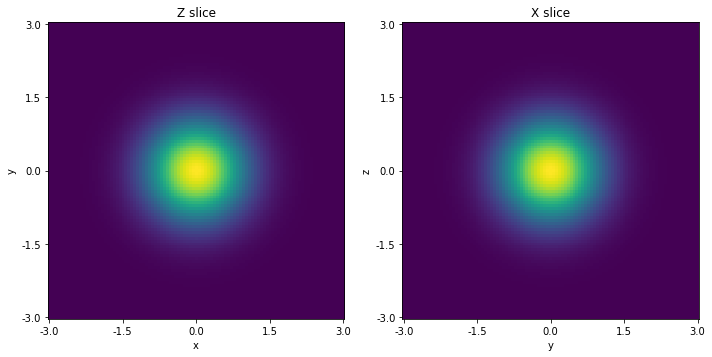

In [61]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
z_slice = values.sel(z=0.0)
tick_locs = list(range(0, 101, 25))
tick_vals = np.linspace(values.coords['x'].values[0], values.coords['y'].values[-1], 5)
axes[0].imshow(z_slice, origin='lower', aspect='equal')
axes[0].set_title('Z slice')
axes[0].set_xlabel(z_slice.dims[0])
axes[0].set_xticks(tick_locs)
axes[0].set_xticklabels(f'{x:.1f}' for x in tick_vals)
axes[0].set_ylabel(z_slice.dims[1])
axes[0].set_yticks(tick_locs)
axes[0].set_yticklabels(f'{x:.1f}' for x in tick_vals)
x_slice = values.sel(x=0.0)
axes[1].imshow(x_slice, origin='lower', aspect='equal')
axes[1].set_title('X slice')
axes[1].set_xlabel(x_slice.dims[0])
axes[1].set_xticks(tick_locs)
axes[1].set_xticklabels(f'{x:.1f}' for x in tick_vals)
axes[1].set_ylabel(x_slice.dims[1])
axes[1].set_yticks(tick_locs)
axes[1].set_yticklabels(f'{x:.1f}' for x in tick_vals)
plt.tight_layout()

Note that labels and tick values are set according to information contained in the xarray representing the data.

## Interpolation

It is straightforward to interpolate data for coordinates that are missing in the xarray, e.g.,

In [62]:
float(values.interp(x=np.pi/2.0, y=np.pi/2.0, z=np.pi/2.0))

0.0002448162927385368

The interpolation is linear, and this function is highly non-linear, so the actual function values at the given point is different.

In [63]:
gaussian(np.pi/2.0, np.pi/2.0, np.pi/2.0)

0.00024331787691818835

Interpolation can be done for an entire plane of 3D data.

In [69]:
values.interp(x=np.pi/1.34)

<xarray.DataArray (y: 101, z: 101)>
array([[2.497462e-11, 3.566822e-11, 5.057514e-11, ..., 5.057514e-11,
        3.566822e-11, 2.497462e-11],
       [3.566822e-11, 5.094060e-11, 7.223034e-11, ..., 7.223034e-11,
        5.094060e-11, 3.566822e-11],
       [5.057514e-11, 7.223034e-11, 1.024178e-10, ..., 1.024178e-10,
        7.223034e-11, 5.057514e-11],
       ...,
       [5.057514e-11, 7.223034e-11, 1.024178e-10, ..., 1.024178e-10,
        7.223034e-11, 5.057514e-11],
       [3.566822e-11, 5.094060e-11, 7.223034e-11, ..., 7.223034e-11,
        5.094060e-11, 3.566822e-11],
       [2.497462e-11, 3.566822e-11, 5.057514e-11, ..., 5.057514e-11,
        3.566822e-11, 2.497462e-11]])
Coordinates:
  * y        (y) float64 -3.0 -2.94 -2.88 -2.82 -2.76 ... 2.82 2.88 2.94 3.0
  * z        (z) float64 -3.0 -2.94 -2.88 -2.82 -2.76 ... 2.82 2.88 2.94 3.0
    x        float64 2.344

## Combining data

### `combine_first`

Data along the same dimension can be combined from several xarrays. Consider a sinoidal signal.

In [126]:
x_vals = np.linspace(0.0, 2.0*np.pi, 15)
signal = xr.DataArray(np.sin(x_vals), dims=('x',), coords=(x_vals,), name='signal')
signal.shape

(15,)

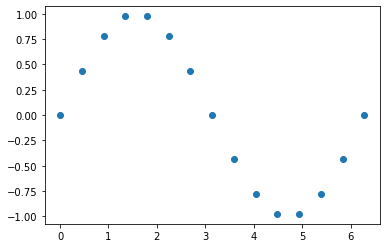

In [113]:
_ = plt.plot(signal.coords['x'], signal, 'o')

Create a second xarray by interpolating the signal.  Since this is 1D data, we can use quadratic interpolation, which is obviously better than the default, linear.

In [138]:
x_vals = np.arange(0.1, 2.0*np.pi, 0.1)
interp_signal = signal.interp(x=x_vals, method='quadratic')
interp_signal.shape

(62,)

In [139]:
interp_signal

<xarray.DataArray 'signal' (x: 62)>
array([ 0.103189,  0.202644,  0.298364,  0.390351,  0.478603,  0.563122,
        0.643753,  0.717532,  0.783318,  0.841111,  0.890911,  0.932165,
        0.963651,  0.985326,  0.997191,  0.999242,  0.991466,  0.973857,
        0.946414,  0.909138,  0.86266 ,  0.808261,  0.74598 ,  0.675816,
        0.597944,  0.514878,  0.427436,  0.33562 ,  0.239428,  0.140362,
        0.041231, -0.0579  , -0.157031, -0.255909, -0.351364, -0.442445,
       -0.529151, -0.611482, -0.688165, -0.757003, -0.817959, -0.871033,
       -0.916094, -0.951717, -0.977506, -0.993462, -0.999584, -0.995882,
       -0.982368, -0.959043, -0.925907, -0.883096, -0.831952, -0.772815,
       -0.705685, -0.630562, -0.549171, -0.464025, -0.375145, -0.28253 ,
       -0.186182, -0.086099])
Coordinates:
  * x        (x) float64 0.1 0.2 0.3 0.4 0.5 0.6 0.7 ... 5.7 5.8 5.9 6.0 6.1 6.2

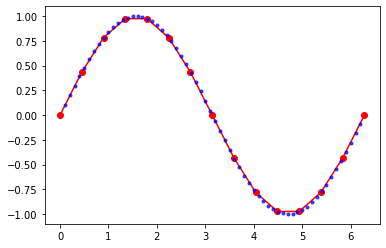

In [140]:
_ = plt.plot(signal.coords['x'], signal, 'ro-')
_ = plt.plot(interp_signal.coords['x'], interp_signal, 'b.', alpha=0.7)

Combine the original and the interpolated signal into a single xarray.

In [141]:
combined = signal.combine_first(interp_signal)
combined.shape

(77,)

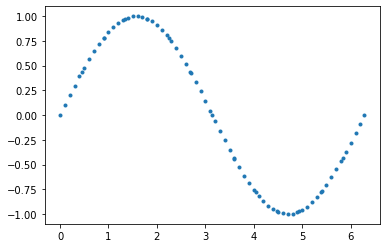

In [142]:
_ = plt.plot(combined.coords['x'], combined, '.')

### `merge`

In [149]:
temperature = xr.DataArray(np.random.normal(loc=20.0, scale=5.0, size=(5, 5)),
                           dims=('x', 'y'), coords={'x': np.linspace(0.0, 1.0, 5),
                                                    'y': np.linspace(0.0, 5.0, 5)},
                           name='temperature')

In [154]:
pressure = xr.DataArray(np.random.normal(loc=1001.0, scale=100.0, size=(5, 5)),
                        dims=('x', 'y'), coords={'x': np.linspace(0.0, 2.0, 5),
                                                 'y': np.linspace(0.0, 3.0, 5)},
                        name='pressure')

In [155]:
data = xr.merge((temperature, pressure))

In [156]:
data

<xarray.Dataset>
Dimensions:      (x: 7, y: 9)
Coordinates:
  * x            (x) float64 0.0 0.25 0.5 0.75 1.0 1.5 2.0
  * y            (y) float64 0.0 0.75 1.25 1.5 2.25 2.5 3.0 3.75 5.0
Data variables:
    temperature  (x, y) float64 18.66 nan 22.89 nan nan ... nan nan nan nan nan
    pressure     (x, y) float64 1.063e+03 954.1 nan 881.6 ... 1.053e+03 nan nan

In [157]:
data.temperature.values

array([[18.65762178,         nan, 22.89176538,         nan,         nan,
        11.6250737 ,         nan, 27.5560791 , 20.09892961],
       [23.30663916,         nan, 24.18577428,         nan,         nan,
         9.24616577,         nan, 16.67123061, 28.08862041],
       [17.52927995,         nan, 29.17391359,         nan,         nan,
         8.92411916,         nan, 13.75006757, 18.48578579],
       [23.51079357,         nan, 23.90661899,         nan,         nan,
        15.11500533,         nan, 15.88378153, 20.10679028],
       [32.82157832,         nan, 19.44949072,         nan,         nan,
        19.39623566,         nan, 14.27149992, 22.81306574],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan]])